In [46]:
import pickle
import scipy.sparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from helper_functions import *
from scipy.sparse import dok_matrix
from sklearn.model_selection import train_test_split

In [2]:
col_names_consumption = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']

df = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=col_names_consumption)
df = df.rename({'user-mboxsha1':'user_id', 'musicbrainz-artist-id':'artist_id'}, axis=1)
df = df[['user_id', 'artist_id', 'plays']]
df.head()

,user_id,artist_id,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,706


# Data Processing

## Filter the data

In [3]:
df.isna().sum()

user_id           0
artist_id    226137
plays             0
dtype: int64

In [4]:
df.shape

(17535655, 3)

In [5]:
# Since there are 1.29% of NaN for the artists, we remove all the rows from df that contains a NaN
df = df.dropna()
df.shape

(17309518, 3)

In [6]:
# Some plays are equal to 0 which is not normal, we delete these rows
df = df.loc[df['plays'] >= 1]

### Thresholds distributions

In [25]:
T1 = 100  # Number of plays per user threshold
T2 = 49    # Number of artists per user threshold

T3 = 50 # Number of plays per artist threshold
T4 = 5  # Number of users per artist threshold

#### Number of plays per user threshold distribution

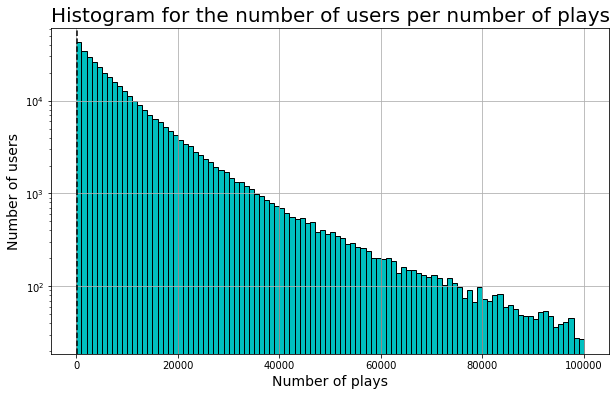

In [26]:
grouped_user = df[['user_id', 'plays']].groupby('user_id').sum()
grouped_user = grouped_user.sort_values(by='plays', ascending=False)
# Only show users having less than 100'000 plays
grouped_user = grouped_user[grouped_user['plays'] <= 100000]

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.axvline(T1, linestyle='--', color='k') 
plt.show()

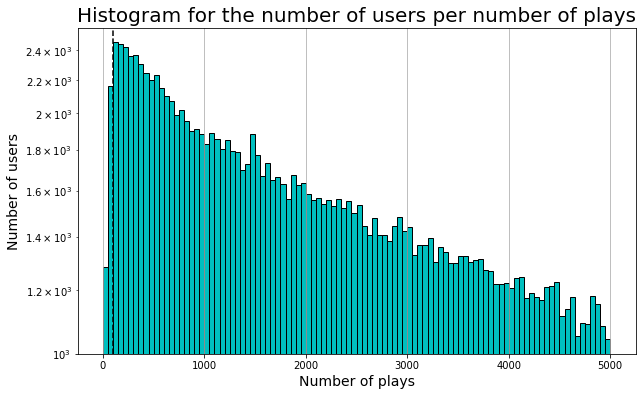

In [27]:
grouped_user = df[['user_id', 'plays']].groupby('user_id').sum()
grouped_user = grouped_user.sort_values(by='plays', ascending=False)
# Only show users having less than 5'000 plays
nb_users = 5000
grouped_user = grouped_user[grouped_user['plays'] <= nb_users]

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.axvline(T1, linestyle='--', color='k') 
plt.show()

#### Number of artists per user threshold

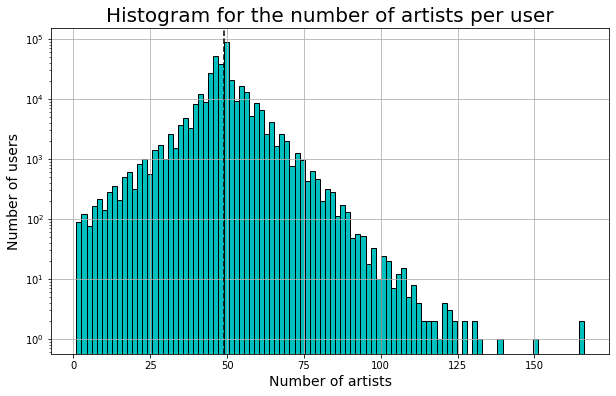

In [28]:
grouped_user = df[['user_id', 'plays']].groupby('user_id').count().rename(columns = {'plays': 'count'})
grouped_user = grouped_user.sort_values(by='count', ascending=False)

grouped_user.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of artists per user', fontsize=20)
plt.xlabel('Number of artists', fontsize=14)
plt.ylabel('Number of users', fontsize=14)

plt.axvline(T2, linestyle='--', color='k') 
plt.show()

#### Number of plays per artist threshold

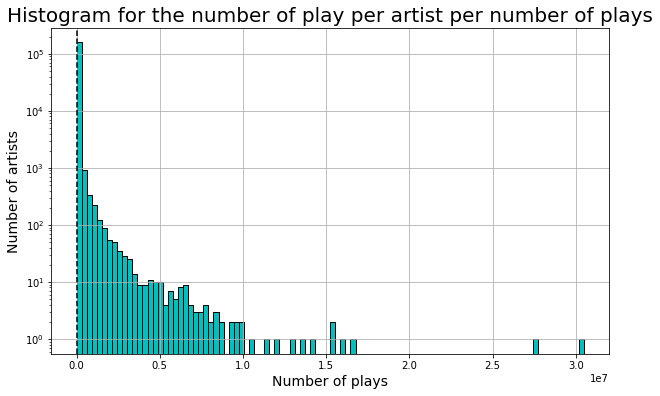

In [29]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').sum()
grouped_artist = grouped_artist.sort_values(by='plays', ascending=False)

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of play per artist per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)
plt.savefig('artists_p_plays.pdf', bbox_inches='tight')

plt.axvline(T3, linestyle='--', color='k') 
plt.show()

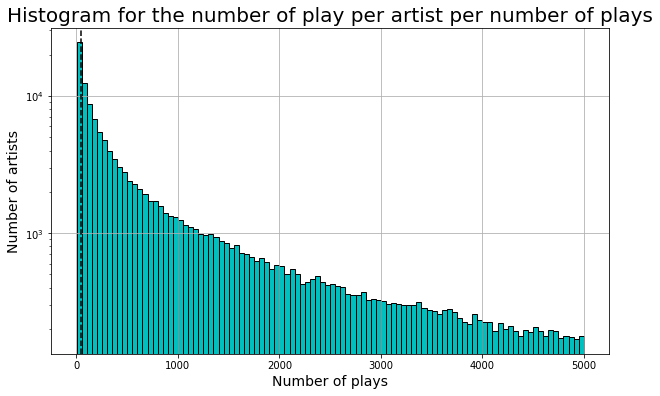

In [30]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').sum()
grouped_artist = grouped_artist.sort_values(by='plays', ascending=False)
# Only show artists having less than 10'000 plays
nb_artists = 5000
grouped_artist = grouped_artist[grouped_artist['plays'] <= nb_artists]

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of play per artist per number of plays', fontsize=20)
plt.xlabel('Number of plays', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)
plt.savefig('artists_p_plays.pdf', bbox_inches='tight')

plt.axvline(T3, linestyle='--', color='k') 
plt.show()

#### Number of users per artist threshold

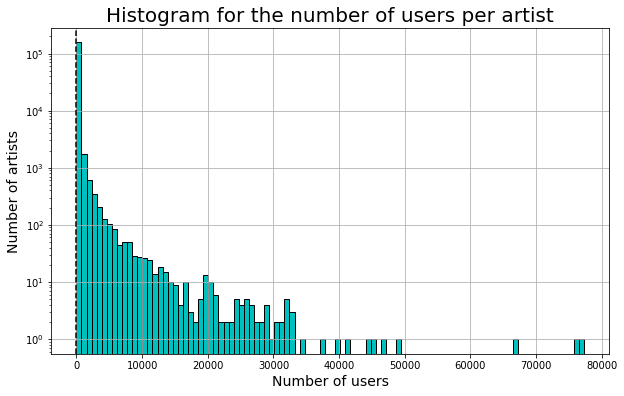

In [31]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').count().rename(columns = {'plays': 'count'})
grouped_artist = grouped_artist.sort_values(by='count', ascending=False)

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per artist', fontsize=20)
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)

plt.axvline(T4, linestyle='--', color='k') 
plt.show()

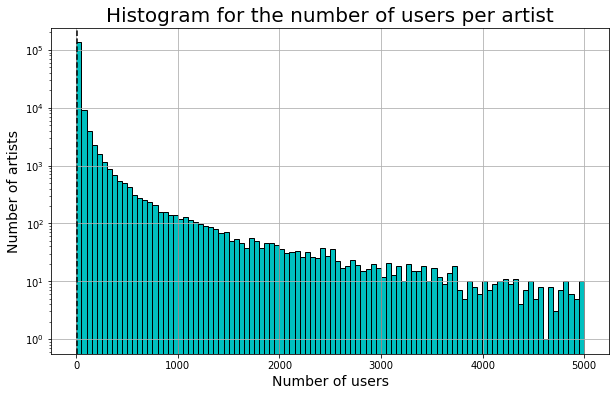

In [32]:
grouped_artist = df[['artist_id', 'plays']].groupby('artist_id').count().rename(columns = {'plays': 'count'})
grouped_artist = grouped_artist.sort_values(by='count', ascending=False)
# Keep only a maximum count of 5'000 
nb_users_count = 5000
grouped_artist = grouped_artist[grouped_artist['count'] <= nb_users_count]

grouped_artist.hist(bins=100, figsize=(10, 6), ec='black', color='c')
plt.yscale('log')
plt.title('Histogram for the number of users per artist', fontsize=20)
plt.xlabel('Number of users', fontsize=14)
plt.ylabel('Number of artists', fontsize=14)

plt.axvline(T4, linestyle='--', color='k')
plt.show()

## Construction of the matrix of plays

In [4]:
plays_per_user = df[['user_id', 'plays']].groupby('user_id').sum()
artists_per_user = df[['user_id', 'plays']].groupby('user_id').count().rename({'plays':'n_artists'}, axis=1)

plays_per_artist = df[['artist_id', 'plays']].groupby('artist_id').sum()
users_per_artist = df[['artist_id', 'plays']].groupby('artist_id').count().rename({'plays':'n_users'}, axis=1)

### Remarks

We would like to have a single matrix where we keep the users and the artists who all satisfy the 4 different thresholds. But since the thresholds are interdependent, removing users will also make us remove artists, and the other way around. Therefore we iterate on removing alternatively the users and the artists, until we converge to two subsets of artists and users which both satisfy the 4 thresholds.

In [24]:
num_iterations = 20
users_filtered_iteration = None
artists_filtered_iteration = None

plays_per_user_filtered = plays_per_user.copy()
artists_per_user_filtered = artists_per_user.copy()

plays_per_artist_filtered = plays_per_artist.copy()
users_per_artist_filtered = users_per_artist.copy()

previous_users_filtered_iteration = set(plays_per_user_filtered.index)
previous_artists_filtered_iteration = set(plays_per_artist_filtered.index)

for i in range(num_iterations):
    
    # Filter users
    users_filtered_iteration = set(plays_per_user_filtered[plays_per_user_filtered['plays'] > T1].index)
    users_filtered_iteration = users_filtered_iteration & set(artists_per_user_filtered[artists_per_user_filtered['n_artists'] > T2].index)
    users_filtered_iteration = users_filtered_iteration & previous_users_filtered_iteration
    
    temp = df[df['user_id'].isin(users_filtered_iteration)]
    temp = temp[temp['artist_id'].isin(previous_artists_filtered_iteration)]
    
    temp = temp[['artist_id', 'plays']].groupby('artist_id')
    plays_per_artist_filtered = temp.sum()
    users_per_artist_filtered = temp.count().rename({'plays':'n_users'}, axis=1)
    
    # Filter artists
    artists_filtered_iteration = set(plays_per_artist_filtered[plays_per_artist_filtered['plays'] > T3].index)
    artists_filtered_iteration = artists_filtered_iteration & set(users_per_artist_filtered[users_per_artist_filtered['n_users'] > T4].index)
    artists_filtered_iteration = artists_filtered_iteration & previous_artists_filtered_iteration
    
    temp = df[df['user_id'].isin(users_filtered_iteration)]
    temp = temp[temp['artist_id'].isin(artists_filtered_iteration)]
    temp = temp[['user_id', 'plays']].groupby('user_id')
    plays_per_user_filtered = temp.sum()
    artists_per_user_filtered = temp.count().rename({'plays':'n_artists'}, axis=1)
    
    print("iteration {}, num users {}, num artists {}".format(i+1, len(users_filtered_iteration), len(artists_filtered_iteration)))
    
    # Stop condition
    if previous_users_filtered_iteration == users_filtered_iteration and previous_artists_filtered_iteration == artists_filtered_iteration:
        print("Converged!")
        break
        
    previous_users_filtered_iteration = users_filtered_iteration.copy()
    previous_artists_filtered_iteration = artists_filtered_iteration.copy()
    

iteration 1, num users 144873, num artists 55352
iteration 2, num users 110672, num artists 47257
iteration 3, num users 106354, num artists 45695
iteration 4, num users 105345, num artists 45278
iteration 5, num users 105032, num artists 45144
iteration 6, num users 104939, num artists 45088
iteration 7, num users 104904, num artists 45076
iteration 8, num users 104897, num artists 45076
iteration 9, num users 104897, num artists 45076
Converged!


## Storing data in sparse matrix

- One user per column
- One artist per row

In [54]:
# Train and Test Split

n_users = len(users_filtered_iteration)

users_train, users_test = train_test_split(np.array(list(users_filtered_iteration)), test_size=0.1)

users_train = set(users_train)
users_test = set(users_test)

In [55]:
# Dictionnary for retrieving the index of a user in the matrix in O(1)

user2id = {}
id2user = {}
for i, user in enumerate(sorted(users_train)):
    user2id[user] = i
    id2user[i] = user
    
user2id_test = {}
id2user_test = {}
for i, user in enumerate(sorted(users_test)):
    user2id_test[user] = i
    id2user_test[i] = user

artist2id = {}
id2artist = {}
for i, artist in enumerate(sorted(artists_filtered_iteration)):
    artist2id[artist] = i
    id2artist[i] = artist

In [56]:
save_to_pickle(user2id, 'user2id', '../data/')
save_to_pickle(id2user, 'id2user', '../data/')

save_to_pickle(user2id_test, 'user2id_test', '../data/')
save_to_pickle(id2user_test, 'id2user_test', '../data/')

save_to_pickle(artist2id, 'artist2id', '../data/')
save_to_pickle(id2artist, 'id2artist', '../data/')

In [69]:
# Create the sparse matrix
S = dok_matrix((len(artists_filtered_iteration), len(users_train)), dtype=np.uint64)
S_test = dok_matrix((len(artists_filtered_iteration), len(users_test)), dtype=np.uint64)

In [70]:
# Fill the data dictionnary
data = {}

for i, (index, row) in enumerate(df.iterrows()):
    
    if i % 1000000 == 0:
        print('Processed {} lines...'.format(i))
    
    user = row['user_id']
    artist = row['artist_id']
    
    # Keep only interesting users and artists
    if (user in users_train) and (artist in artists_filtered_iteration):
        
        if (artist2id[artist], user2id[user]) in data.keys():
            data[(artist2id[artist], user2id[user])] += row['plays']
        else:
            data[(artist2id[artist], user2id[user])] = row['plays']

Processed 0 lines...
Processed 1000000 lines...
Processed 2000000 lines...
Processed 3000000 lines...
Processed 4000000 lines...
Processed 5000000 lines...
Processed 6000000 lines...
Processed 7000000 lines...
Processed 8000000 lines...
Processed 9000000 lines...
Processed 10000000 lines...
Processed 11000000 lines...
Processed 12000000 lines...
Processed 13000000 lines...
Processed 14000000 lines...
Processed 15000000 lines...
Processed 16000000 lines...
Processed 17000000 lines...


In [71]:
data_test = {}  

for i, (index, row) in enumerate(df.iterrows()):
    
    if i % 1000000 == 0:
        print('Processed {} lines...'.format(i))
    
    user = row['user_id']
    artist = row['artist_id']
    
    # Keep only interesting users and artists
    if (user in users_test) and (artist in artists_filtered_iteration):
        
        if (artist2id[artist], user2id_test[user]) in data_test.keys():
            data_test[(artist2id[artist], user2id_test[user])] += row['plays']
        else:
            data_test[(artist2id[artist], user2id_test[user])] = row['plays']

Processed 0 lines...
Processed 1000000 lines...
Processed 2000000 lines...
Processed 3000000 lines...
Processed 4000000 lines...
Processed 5000000 lines...
Processed 6000000 lines...
Processed 7000000 lines...
Processed 8000000 lines...
Processed 9000000 lines...
Processed 10000000 lines...
Processed 11000000 lines...
Processed 12000000 lines...
Processed 13000000 lines...
Processed 14000000 lines...
Processed 15000000 lines...
Processed 16000000 lines...
Processed 17000000 lines...


In [72]:
# store it in the sparse matrix
dict.update(S, data)
dict.update(S_test, data_test)

S = S.tocsr()
S_test = S_test.tocsr()

In [74]:
scipy.sparse.save_npz('../data/matrix_plays.npz', S)
scipy.sparse.save_npz('../data/matrix_plays_test.npz', S_test)

In [66]:
S

<45076x94407 sparse matrix of type '<class 'numpy.uint8'>'
	with 5241191 stored elements in Compressed Sparse Row format>

In [67]:
S_test

<45076x10490 sparse matrix of type '<class 'numpy.uint8'>'
	with 581793 stored elements in Compressed Sparse Row format>